In [1]:
import os
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df_raw = pd.read_csv('./data/Customer-Churn-Records.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
df_raw.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [4]:
df_raw.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [5]:
df_raw.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [6]:
df_raw.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [7]:
print(df_raw.Geography.unique())
print(df_raw.Gender.unique())
print(df_raw['Card Type'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [8]:
df_raw['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [22]:
print(df_raw.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


/tmp/ipykernel_16793/2092309050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='Gender', y='Age',palette='Set2')
/tmp/ipykernel_16793/2092309050.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='Gender', y='EstimatedSalary',palette='Set2')


Text(0.5, 1.0, 'Boxplot of Estimated Salary by Gender')

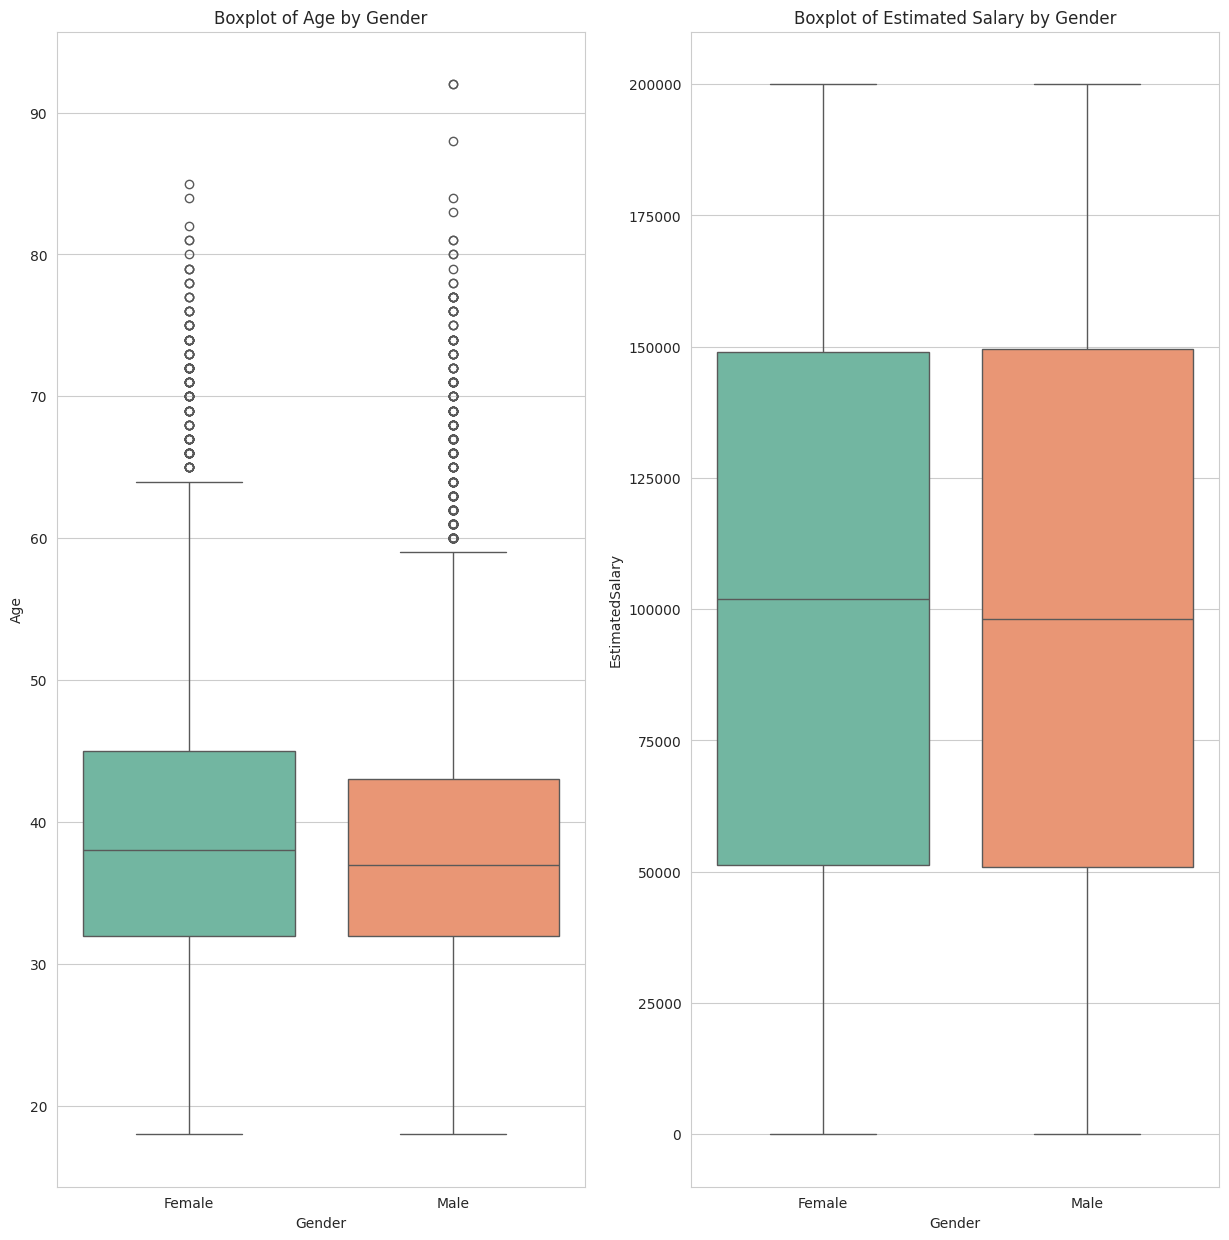

In [23]:
#성별에 따른 나이 분포
#남성과 여성 중 누가 평균적으로 나이가 많은지 확인 가능
#나이 분포의 중앙값과 범위를 비교할 수 있음
#plt.subplot(행, 열, 위치)
plt.subplot(1, 2, 1)
sns.boxplot(data=df_raw, x='Gender', y='Age',palette='Set2')
plt.title('Boxplot of Age by Gender')
#성별에 따른 예상 급여분포
#남성과 여성 중 누가 평균적으로 급여가 높은지 확인 가능.
#급여 분포가 더 넓은(즉, 다양성이 큰) 성별을 알 수 있음.
plt.subplot(1, 2, 2)
sns.boxplot(data=df_raw, x='Gender', y='EstimatedSalary',palette='Set2')
plt.title('Boxplot of Estimated Salary by Gender')

/tmp/ipykernel_16793/2869970445.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='Exited', y='CreditScore', palette='Set2')
/tmp/ipykernel_16793/2869970445.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='Exited', y='Age', palette='Set2')
/tmp/ipykernel_16793/2869970445.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_raw, x='Exited', y='Tenure', palette='Set2')
/tmp/ipykernel_16793/2869970445.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

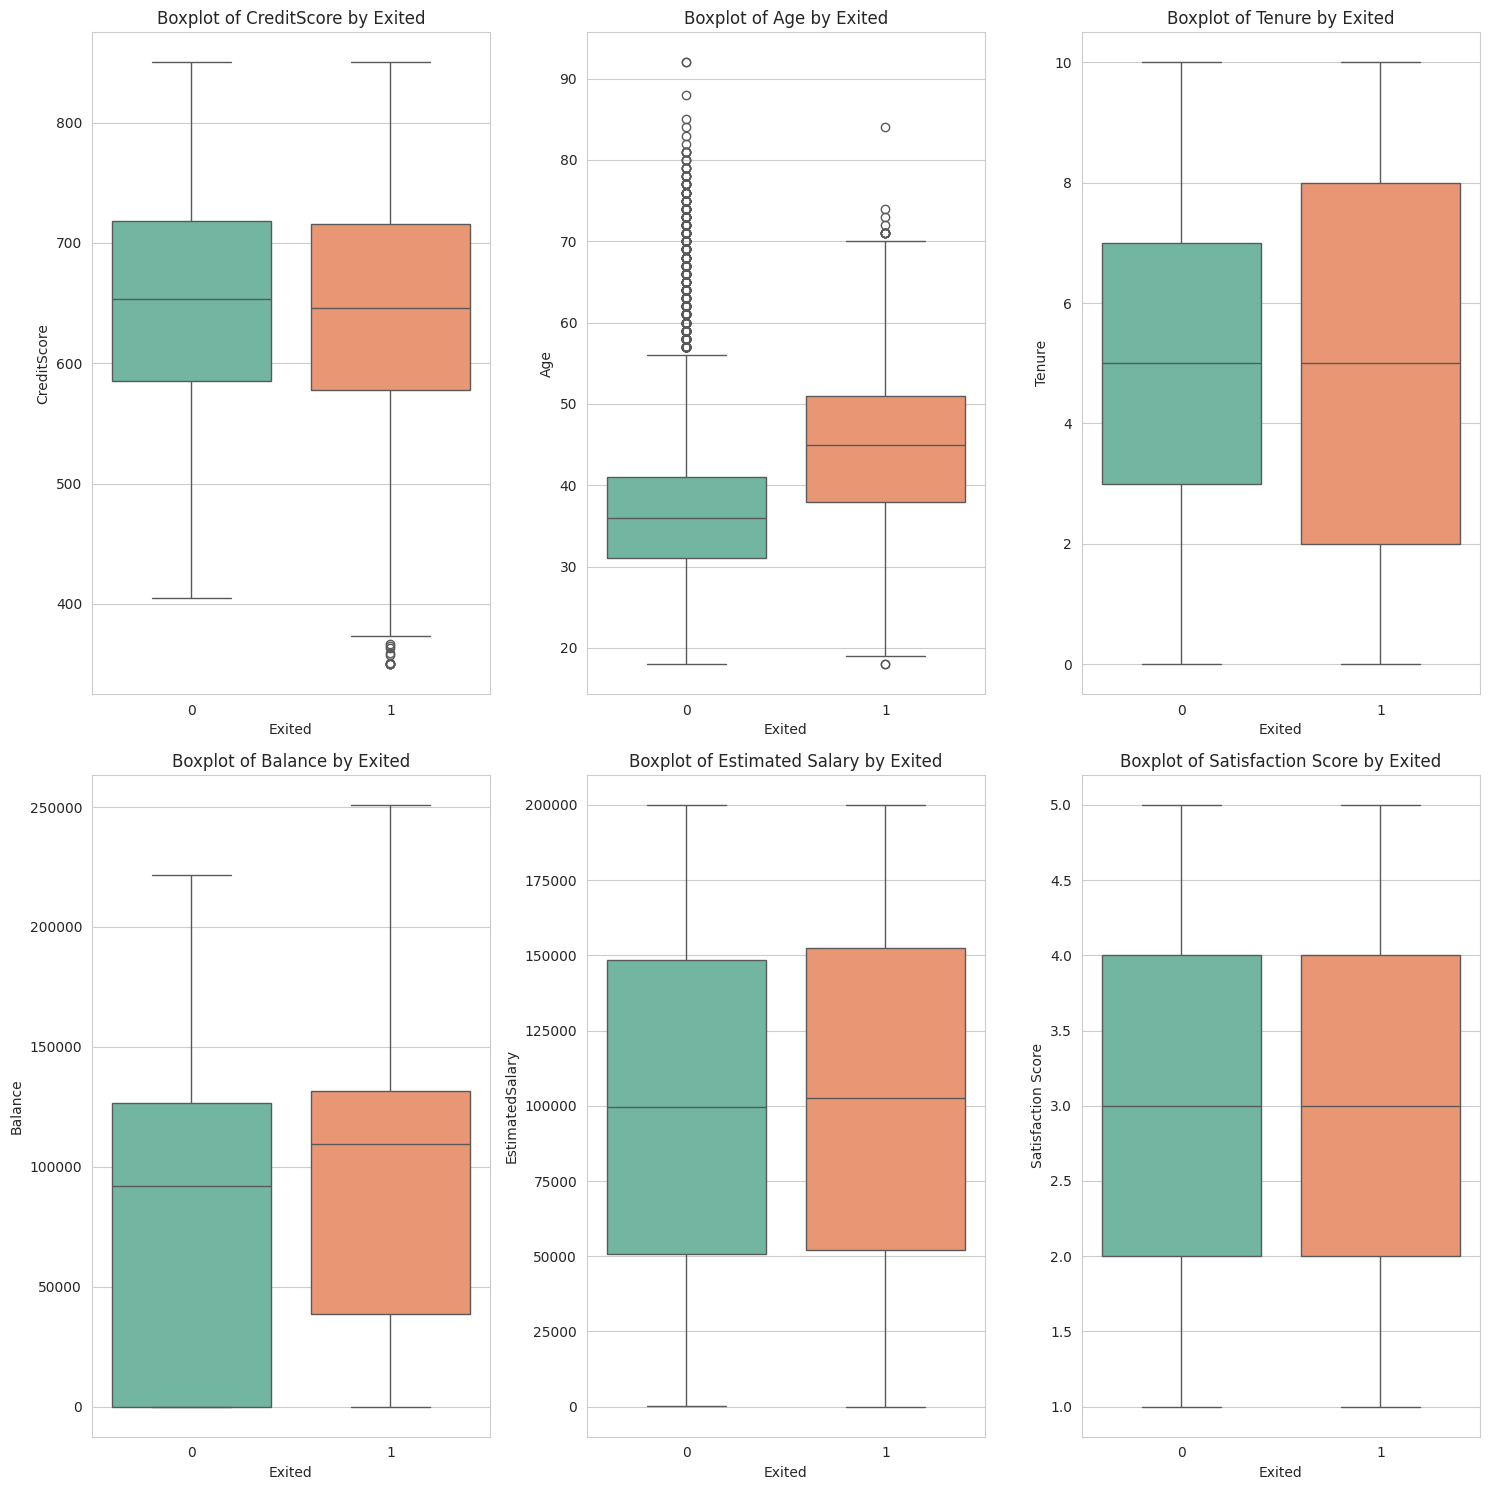

In [18]:

# CreditScore (신용 점수)
#이탈 고객과 비이탈 고객 간의 신용 점수 차이를 확인
plt.subplot(2, 3, 1)
sns.boxplot(data=df_raw, x='Exited', y='CreditScore', palette='Set2')
plt.title('Boxplot of CreditScore by Exited')

# Age (나이) 분포
#나이에 따른 이탈 분포를 파악
plt.subplot(2, 3, 2)
sns.boxplot(data=df_raw, x='Exited', y='Age', palette='Set2')
plt.title('Boxplot of Age by Exited')

# Tenure (고객 가입 기간) 분포
#고객이 은행과 관계를 유지한 기간에 따른 이탈을 확인
plt.subplot(2, 3, 3)
sns.boxplot(data=df_raw, x='Exited', y='Tenure', palette='Set2')
plt.title('Boxplot of Tenure by Exited')

# Balance (계좌 잔액) 분포
#계좌 잔액에 따른 이탈
plt.subplot(2, 3, 4)
sns.boxplot(data=df_raw, x='Exited', y='Balance', palette='Set2')
plt.title('Boxplot of Balance by Exited')

# Estimated Salary (예상 급여) 분포
#예상 급여에 따른 고객 이탈 여부를 확인
plt.subplot(2, 3, 5)
sns.boxplot(data=df_raw, x='Exited', y='EstimatedSalary', palette='Set2')
plt.title('Boxplot of Estimated Salary by Exited')

# Satisfaction Score(만족도 점수) 분포
#고객의 만족도와 이탈 여부의 관계를 확인
plt.subplot(2, 3, 6)
sns.boxplot(data=df_raw, x='Exited', y='Satisfaction Score', palette='Set2')
plt.title('Boxplot of Satisfaction Score by Exited')

plt.tight_layout()
plt.show()